In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
%matplotlib inline
#%config InlineBackend.figure_format = 'retina'
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = (9, 5)

import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

import datetime
from dateutil.relativedelta import relativedelta
from arch import arch_model

p = print

C:\Users\blacat\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [57]:
# зафиксируем выборку
np.random.seed(1)

In [4]:
# функция mean absolute persentage error
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))*100

# ARIMA (1, 0, 0)
alpha = 0.5 , p = 1, d = 0, q = 0

процесс сводится к процессу AR, используем arma_generate

In [17]:
AR1 = {} # словарь для хранения данных модели
cff_prd = [] # список для хранения коэффициентов n-ой модели
cff_mape = [] # писок для хранения mape n-ого шага
min_mape, min_n = 5.0, 0 # в описании 0,05, но в задании mean absolute persantage (!) 

In [18]:
alphas = np.array([.5]) # p = 1
betas = np.array([0.]) # q = 0
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]
cnt = 1 # шаг генерации

In [19]:
# генерируем выборку от N = 30 до 3000 точек, генерируем ar процесс, все данные сохраняем

for i in range(30, 3001, 10):
    
    n = int(i)
    # генерация процесса для n точек, где n равно i-му шагу
    ar1 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n, burnin=20)
    mdl = smt.ARMA(ar1,order=(1,0)).fit(maxlag=20, ic='aic', trend='nc')        
    
    #считаем ошибку в определении alpha
    cff_prd.append(mdl.params[0])
    
    # mape(np.ones(cnt)*0.5,cff_prd) - считает ошибку для n точек
    cff_mape.append(mape(np.ones(cnt)*0.5,cff_prd)) 
    print(n,', mape =', cff_mape[cnt-1])
    if min_n == 0:
        if cff_mape[cnt-1] <= min_mape:
            #print()
            #print(cff_mape[cnt-1], min_mape, min_n, n)
            min_n = n
            
    cnt+=1 # для увеличения размерности true матрицы alphas     
    AR1[n] = ar1 
  
         

C:\Users\blacat\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\blacat\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


30 , mape = 31.068312182861114
40 , mape = 28.93067652762012
50 , mape = 22.210070052890607
60 , mape = 25.68414924598047
70 , mape = 27.022750612853407
80 , mape = 26.79884593371384
90 , mape = 25.304955497054394
100 , mape = 22.460102500999962
110 , mape = 21.198788740670395
120 , mape = 19.297526526122798
130 , mape = 19.18855298944685
140 , mape = 20.590190521028852
150 , mape = 19.054639292562644
160 , mape = 18.156320896797283
170 , mape = 19.325877423593376
180 , mape = 18.49719955733387
190 , mape = 17.468491374876848
200 , mape = 17.031443523898577
210 , mape = 17.053586131573432
220 , mape = 16.34957993305522
230 , mape = 16.020121597225977
240 , mape = 15.55744066600905
250 , mape = 15.152017198840403
260 , mape = 14.785491680305347
270 , mape = 14.22687188931909
280 , mape = 14.048164871076715
290 , mape = 14.328684026424233
300 , mape = 14.194611825875093
310 , mape = 14.105995575857674
320 , mape = 13.894163088834196
330 , mape = 13.834241030861078
340 , mape = 13.4053298

2640 , mape = 4.850679844716006
2650 , mape = 4.839861526884588
2660 , mape = 4.82220623686907
2670 , mape = 4.8193803003702635
2680 , mape = 4.803432944717414
2690 , mape = 4.795719819715089
2700 , mape = 4.7998351164589605
2710 , mape = 4.802887865951137
2720 , mape = 4.802388406034855
2730 , mape = 4.794939606594821
2740 , mape = 4.785818713502384
2750 , mape = 4.78868664268971
2760 , mape = 4.783393699682041
2770 , mape = 4.777193836231528
2780 , mape = 4.7832269772746185
2790 , mape = 4.768972328993545
2800 , mape = 4.753728659742002
2810 , mape = 4.739288560577635
2820 , mape = 4.728130802697042
2830 , mape = 4.730875967212682
2840 , mape = 4.727303285797431
2850 , mape = 4.712084316228129
2860 , mape = 4.717367996167659
2870 , mape = 4.702623732169572
2880 , mape = 4.705444060841766
2890 , mape = 4.703418623383851
2900 , mape = 4.6953431149259615
2910 , mape = 4.684993246030611
2920 , mape = 4.678272938276818
2930 , mape = 4.667121746701109
2940 , mape = 4.651992744055514
2950 ,

In [20]:
p()            
p('Min n={:1d}, при котором достигается mape alpha менее 5%'.format(min_n) )  


Min n=2510, при котором достигается mape alpha менее 5%


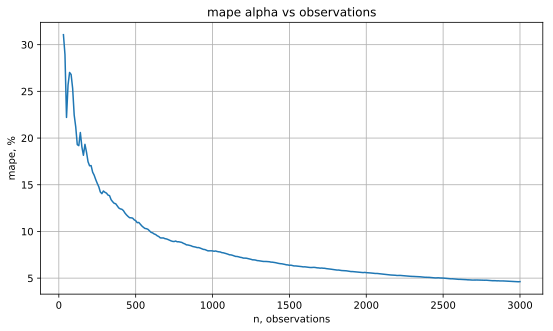

In [21]:
plt.plot(np.array(range(30, 3001, 10)),cff_mape)
plt.xlabel('n, observations')
plt.ylabel('mape, %')
plt.grid()
plt.title('mape alpha vs observations');

# ARIMA (0, 0, 1)
beta = 0.5 , p = 0, d = 0, q = 1

процесс сводится к процессу MA, используем arma_generate

In [39]:
cff_prd = [] # список для хранения коэффициентов n-ой модели
cff_mape = [] # писок для хранения mape n-ого шага
min_mape, min_n = 5.0, 0 # в описании 0,05, но в задании mean absolute persantage (!) 

In [40]:
alphas = np.array([0.]) # p = 0
betas = np.array([0.5]) # q = 1
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]
cnt = 1 # шаг генерации

In [41]:
# генерируем выборку от N = 30 до 3000 точек, генерируем ma процесс, все данные сохраняем

for i in range(30, 3001, 10):
    
    n = int(i)
    
    # генерация процесса для n точек, где n равно i-му шагу
    ma1 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n, burnin=20)
    mdl = smt.ARMA(ma1[20:],order=(0,1)).fit(maxlag=20, ic='aic', trend='nc')        
    
    #считаем ошибку в определении beta
    
    cff_prd.append(mdl.params[0])
     # mape(np.ones(cnt)*0.5,cff_prd) - считает ошибку для n точек
    cff_mape.append(mape(np.ones(cnt)*0.5,cff_prd)) 
    
    print(n,', mape =', cff_mape[cnt-1])
    if min_n == 0:
        if cff_mape[cnt-1] <= min_mape:
            min_n = n
            
    cnt+=1 # для увеличения размерности true матрицы alphas     
  


C:\Users\blacat\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\blacat\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


30 , mape = 13.778534662169427
40 , mape = 17.600282390097405
50 , mape = 14.0057628763781
60 , mape = 14.323438298115896
70 , mape = 13.592639945302713
80 , mape = 12.455445303245295
90 , mape = 10.925032573381632
100 , mape = 12.18020691541189
110 , mape = 12.913551621565786
120 , mape = 12.770236971697607
130 , mape = 13.982075682746812
140 , mape = 12.82448089731372
150 , mape = 13.616870461833916
160 , mape = 13.897848442749911
170 , mape = 13.321427038241065
180 , mape = 13.721384979092207
190 , mape = 13.222328891521439
200 , mape = 13.217333473247297
210 , mape = 12.708574167185246
220 , mape = 12.473439538009256
230 , mape = 12.040963941586002
240 , mape = 12.050081938722917
250 , mape = 11.733607769802855
260 , mape = 11.720952815091655
270 , mape = 11.533924531818217
280 , mape = 11.133064014725589
290 , mape = 11.134947633378996
300 , mape = 10.965921748943616
310 , mape = 10.678259095808405
320 , mape = 10.60656616242652
330 , mape = 10.685604554354192
340 , mape = 10.3552

2760 , mape = 4.906429874571014
2770 , mape = 4.893092824647895
2780 , mape = 4.883613668286776
2790 , mape = 4.867905354422586
2800 , mape = 4.869845078639625
2810 , mape = 4.858275142188636
2820 , mape = 4.853614360358603
2830 , mape = 4.845679956979499
2840 , mape = 4.83814449300527
2850 , mape = 4.828976284433818
2860 , mape = 4.828027073595893
2870 , mape = 4.816379467390039
2880 , mape = 4.820582990709054
2890 , mape = 4.81635792673584
2900 , mape = 4.80290694709107
2910 , mape = 4.810671434265869
2920 , mape = 4.812422887544098
2930 , mape = 4.800433256562887
2940 , mape = 4.797833389467142
2950 , mape = 4.798461383668164
2960 , mape = 4.79734286496745
2970 , mape = 4.785064147005163
2980 , mape = 4.773741400253269
2990 , mape = 4.778333147576386
3000 , mape = 4.770869818257769


In [42]:
p()            
p('Min n={:1d}, при котором достигается mape beta менее 5%'.format(min_n) ) 


Min n=2630, при котором достигается mape beta менее 5%


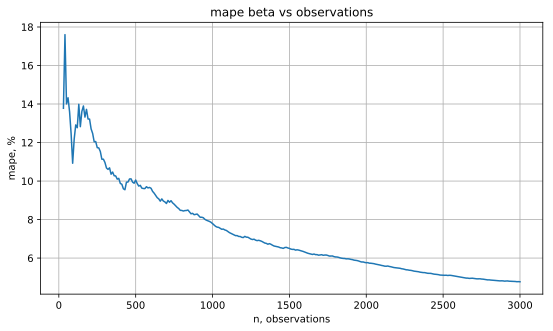

In [43]:
plt.plot(np.array(range(30, 3001, 10)),cff_mape)
plt.xlabel('n, observations')
plt.ylabel('mape, %')
plt.grid()
plt.title('mape beta vs observations');

# ARIMA (1, 0, 1)

alpha = 0.5, beta = 0.5 , p = 1, d = 0, q = 1

In [88]:
cff_prd_a, cff_prd_b = [], [] # список для хранения коэффициентов n-ой модели
cff_mape_a, cff_mape_b, cff_mape_ab = [], [], [] # писок для хранения mape n-ого шага
min_mape, min_n_a, min_n_b, min_n_ab = 5.0, 0, 0,0 # в описании 0,05, но в задании mean absolute persantage (!)

In [89]:
alphas = np.array([0.5]) # p = 1
betas = np.array([0.5]) # q = 1
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]
cnt = 1 # шаг генерации

In [90]:
# генерируем выборку от N = 30 до 3000 точек, генерируем ma процесс, все данные сохраняем
# визуальный осмотр вектора mape показал, что порог 5% не достигается при кол-ве точек 3000,  
# поэтому увеличила n до 4500

for i in range(30, 4501, 10):
    
    n = int(i)
    arma11 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n, burnin=20)
    mdl = smt.ARMA(arma11,order=(1,1)).fit(maxlag=20, ic='aic', trend='nc')
    
    #считаем ошибку в определении alpha для n точек  
    cff_prd_a.append(mdl.params[0])
    cff_mape_a.append(mape(np.ones(cnt)*0.5,cff_prd_a)) 
    
    #считаем ошибку в определении beta для n точек
    cff_prd_b.append(mdl.params[1])
    cff_mape_b.append(mape(np.ones(cnt)*0.5,cff_prd_b)) 

    cff_mape_ab.append((cff_mape_a[cnt-1]+cff_mape_b[cnt-1])/2.0)
    print(n,', mape =', cff_mape_ab[cnt-1])

    
    if min_n_ab == 0:
        if cff_mape_ab[cnt-1] < min_mape:
            min_n_ab = n
        
    
    cnt+=1 # для увеличения размерности true матрицы alphas и betas

C:\Users\blacat\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\blacat\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


30 , mape = 13.565762612300786
40 , mape = 21.968851067508098
50 , mape = 25.50560985261533
60 , mape = 20.82863268578084
70 , mape = 18.532152634808718
80 , mape = 17.543574933065827
90 , mape = 16.735383002491005
100 , mape = 19.181131004173842
110 , mape = 18.13433476466603
120 , mape = 17.14774775354679
130 , mape = 17.849721729375304
140 , mape = 18.53603618114329
150 , mape = 17.662619533626287
160 , mape = 16.844128985498212
170 , mape = 16.35099961883997
180 , mape = 16.39853135156099
190 , mape = 17.025172650298146
200 , mape = 17.000388704054636
210 , mape = 16.500179265155626
220 , mape = 16.319679607113763
230 , mape = 16.509482875718053
240 , mape = 16.49854385663839
250 , mape = 16.569434136046716
260 , mape = 16.881316967918785
270 , mape = 16.723593380301473
280 , mape = 16.35771418263038
290 , mape = 16.407333552016894
300 , mape = 16.19648588865534
310 , mape = 15.897053579657637
320 , mape = 15.502424195420904
330 , mape = 15.36845508273435
340 , mape = 15.2715615912

2610 , mape = 6.447483581590305
2620 , mape = 6.442034040939786
2630 , mape = 6.433325245740625
2640 , mape = 6.421668021213678
2650 , mape = 6.408264062922974
2660 , mape = 6.408519756412093
2670 , mape = 6.398017108654387
2680 , mape = 6.380194056894247
2690 , mape = 6.362385140199476
2700 , mape = 6.345480178367407
2710 , mape = 6.34044713502497
2720 , mape = 6.33182520532624
2730 , mape = 6.317305831295368
2740 , mape = 6.316629454485712
2750 , mape = 6.300131258017116
2760 , mape = 6.282613104651971
2770 , mape = 6.269777410236632
2780 , mape = 6.256908362853569
2790 , mape = 6.244471752098985
2800 , mape = 6.224221317474538
2810 , mape = 6.223536911817753
2820 , mape = 6.226161851778286
2830 , mape = 6.208486034098661
2840 , mape = 6.196770215797884
2850 , mape = 6.184043664529238
2860 , mape = 6.16724374194032
2870 , mape = 6.150283166405769
2880 , mape = 6.150962557220757
2890 , mape = 6.135740042920959
2900 , mape = 6.127135164823223
2910 , mape = 6.130133599740068
2920 , mape

In [91]:
p()
#print('Min n {:1d} aplpha, min n {:1d} beta'.format(min_n_a, min_n_b))
p('Min n={:1d}, при котором достигается mape alpha и beta менее 5%'.format(min_n_ab) ) 


Min n=4460, при котором достигается mape alpha и beta менее 5%


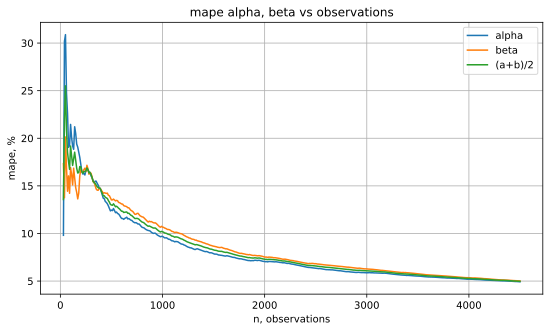

In [92]:
plt.plot(np.array(range(30, 4501, 10)),cff_mape_a, label = 'alpha')
plt.plot(np.array(range(30, 4501, 10)),cff_mape_b, label = 'beta')
plt.plot(np.array(range(30, 4501, 10)),cff_mape_ab, label = '(a+b)/2' )
plt.legend(loc='upper right')
plt.xlabel('n, observations')
plt.ylabel('mape, %')
plt.grid()
plt.title('mape alpha, beta vs observations')
plt.show()